In [2]:
#pip install jieba gensim

     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
      --------------------------------------- 0.3/19.2 MB ? eta -:--:--
      --------------------------------------- 0.3/19.2 MB ? eta -:--:--
     - -------------------------------------- 0.8/19.2 MB 1.3 MB/s eta 0:00:14
     -- ------------------------------------- 1.3/19.2 MB 1.7 MB/s eta 0:00:11
     ----- ---------------------------------- 2.6/19.2 MB 2.6 MB/s eta 0:00:07
     -------- ------------------------------- 3.9/19.2 MB 3.4 MB/s eta 0:00:05
     -------------- ------------------------- 6.8/19.2 MB 5.1 MB/s eta 0:00:03
     ------------------- -------------------- 9.2/19.2 MB 5.9 MB/s eta 0:00:02
     -----------------

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import jieba
from collections import Counter
import re

In [66]:
df = pd.read_excel('AInews_text.xlsx', sheet_name='Sheet1')
print(df.head())

                News Title              Publication Date  \
0    “2024青少年数学与人工智能夏令营”结营  2024-08-11 10:41:58\n来源：主站新闻   
1      “AI湖北行动”共建人工智能产业生态圈  2024-08-14 08:20:55\n来源：地方新闻   
2  “ChatGPT之父”关于人工智能有哪些新观点  2024-01-22 09:14:34\n来源：主站新闻   
3      “充分凸显了中国在人工智能领域的发展”  2024-07-12 09:07:13\n来源：主站新闻   
4         “大数据+人工智能”赋能基层治理  2024-03-30 08:06:27\n来源：主站新闻   

                                        News Summary  \
0  “2024青少年数学与人工智能夏令营”结营\n人民网北京8月11日电 （记者李昉）日前，由清...   
1  “AI湖北行动”共建人工智能产业生态圈\n近年来，湖北省积极推动人工智能与实体经济深度融合，...   
2  “ChatGPT之父”关于人工智能有哪些新观点\n2022年11月，OpenAI推出大语言模...   
3  “充分凸显了中国在人工智能领域的发展”\n人民网开罗7月11日电（记者沈小晓）近日，2024...   
4  “大数据+人工智能”赋能基层治理\n镇里引入“大数据+人工智能”技术，建立基于网格的综合信息...   

                                           News Link  
0  http://edu.people.com.cn/n1/2024/0811/c1006-40...  
1  http://hb.people.com.cn/n2/2024/0814/c194063-4...  
2  http://finance.people.com.cn/n1/2024/0122/c100...  
3  http://world.people.com.cn/n1/2024/0712/c1002-...  
4  http://dangjian.people.c

## 4.1News Time Frequency

In [67]:
print(df['Publication Date'].dtype)
print(df['Publication Date'].head(10))

object
0    2024-08-11 10:41:58\n来源：主站新闻
1    2024-08-14 08:20:55\n来源：地方新闻
2    2024-01-22 09:14:34\n来源：主站新闻
3    2024-07-12 09:07:13\n来源：主站新闻
4    2024-03-30 08:06:27\n来源：主站新闻
5    2024-07-10 11:44:29\n来源：地方新闻
6    2024-07-05 17:22:35\n来源：主站新闻
7    2023-09-21 08:45:30\n来源：地方新闻
8    2024-05-27 08:25:11\n来源：地方新闻
9    2024-03-18 08:28:22\n来源：地方新闻
Name: Publication Date, dtype: object


In [68]:
df['Publication Date'] = df['Publication Date'].str.split('\n').str[0]
print(df['Publication Date'].head())

0    2024-08-11 10:41:58
1    2024-08-14 08:20:55
2    2024-01-22 09:14:34
3    2024-07-12 09:07:13
4    2024-03-30 08:06:27
Name: Publication Date, dtype: object


In [69]:
df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce')
print(df['Publication Date'].head())

0   2024-08-11 10:41:58
1   2024-08-14 08:20:55
2   2024-01-22 09:14:34
3   2024-07-12 09:07:13
4   2024-03-30 08:06:27
Name: Publication Date, dtype: datetime64[ns]


In [70]:
df['Year-Month'] = df['Publication Date'].dt.to_period('M')
news_trend = df.groupby('Year-Month').size().reset_index(name='News Count')

In [71]:
print(news_trend.head())

  Year-Month  News Count
0    2023-01           1
1    2023-02           2
2    2023-03           3
3    2023-04           3
4    2023-05           5


In [72]:
news_trend.dropna(subset=['Year-Month', 'News Count'], inplace=True)
news_trend['Year-Month'] = news_trend['Year-Month'].astype(str)

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na

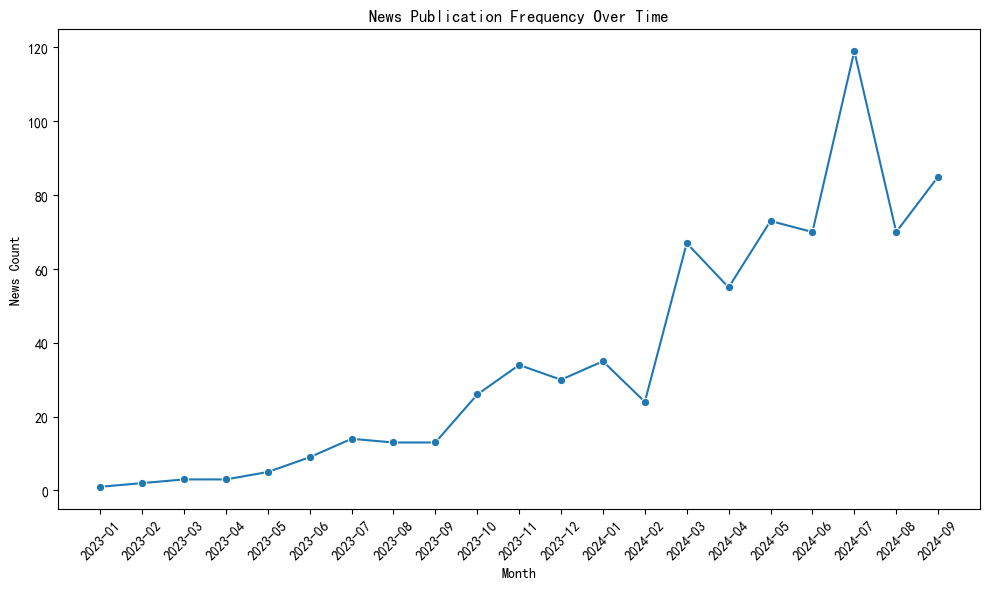

In [133]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=news_trend, x='Year-Month', y='News Count', marker='o')
plt.title('News Publication Frequency Over Time')
plt.xlabel('Month')
plt.ylabel('News Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('news_publication_frequency.png', transparent=True)
plt.show()

## 4.2Keyword Popularity Analysis

In [116]:
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())


additional_stopwords = {'月', '年', '主', '站', '什么', '新', '中'}
stopwords.update(additional_stopwords)

def clean_and_tokenize(text):
    text_cleaned = re.sub(r'[^\w\s]', '', str(text))
    words = jieba.cut(text_cleaned)
    words_filtered = [word for word in words if word not in stopwords and len(word.strip()) > 0]
    return ' '.join(words_filtered)

In [117]:
df['News Summary Cleaned'] = df['News Summary'].apply(clean_and_tokenize)

In [118]:
print(df[['News Summary', 'News Summary Cleaned']].head())

                                        News Summary  \
0  “2024青少年数学与人工智能夏令营”结营\n人民网北京8月11日电 （记者李昉）日前，由清...   
1  “AI湖北行动”共建人工智能产业生态圈\n近年来，湖北省积极推动人工智能与实体经济深度融合，...   
2  “ChatGPT之父”关于人工智能有哪些新观点\n2022年11月，OpenAI推出大语言模...   
3  “充分凸显了中国在人工智能领域的发展”\n人民网开罗7月11日电（记者沈小晓）近日，2024...   
4  “大数据+人工智能”赋能基层治理\n镇里引入“大数据+人工智能”技术，建立基于网格的综合信息...   

                                News Summary Cleaned  
0  2024 青少年 数学 人工智能 夏令营 结营 人民网 北京 11 日电 李昉 日前 清华大...  
1  AI 湖北 共建 人工智能 产业 生态圈 湖北省 推动 人工智能 实体 经济 深度 融合 持...  
2  ChatGPT 之父 人工智能 观点 2022 11 OpenAI 推出 语言 模型 Cha...  
3  凸显 中国 人工智能 领域 发展 人民网 开罗 11 日电 沈小晓 近日 2024 世界 人...  
4  数据 人工智能 赋能 基层 治理 镇里 引入 数据 人工智能 技术 建立 网格 综合信息 平...  


In [119]:

all_words = ' '.join(df['News Summary Cleaned']).split()
word_freq = Counter(all_words)
common_words = [word for word, freq in word_freq.most_common(10)]

keyword_trend = pd.DataFrame()

for word in common_words:
    df[f'{word}_count'] = df['News Summary Cleaned'].apply(lambda x: x.count(word))
    monthly_counts = df.groupby('Year-Month')[f'{word}_count'].sum().reset_index(name=f'{word}_frequency')
    keyword_trend = pd.merge(keyword_trend, monthly_counts, on='Year-Month', how='outer') if not keyword_trend.empty else monthly_counts


In [120]:
keyword_trend.dropna(subset=[f'{word}_frequency' for word in common_words], inplace=True)
keyword_trend['Year-Month'] = keyword_trend['Year-Month'].astype(str)

In [121]:
for word in common_words:
    keyword_trend[f'{word}_frequency'] = pd.to_numeric(keyword_trend[f'{word}_frequency'], errors='coerce')

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na

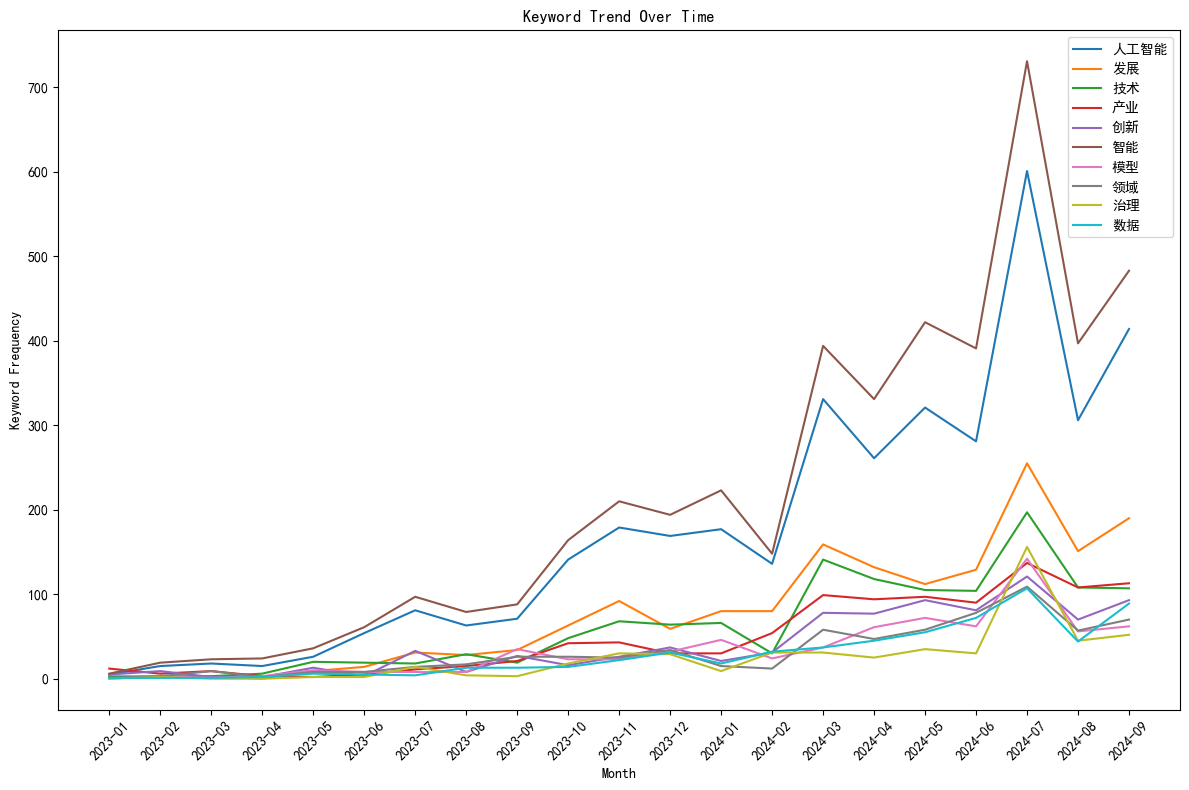

In [134]:
plt.figure(figsize=(12, 8))
for word in common_words:
    sns.lineplot(data=keyword_trend, x='Year-Month', y=f'{word}_frequency', label=word)
plt.title('Keyword Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Keyword Frequency')
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('keyword_popularity_analysis.png', transparent=True)
plt.show()

## 4.3LDA

#### NOTES: two visualizations—one based on **TF-IDF** and the other based on **CountVectorizer**—both using **LDA** (Latent Dirichlet Allocation) for topic modeling. 

##### 1. **Intertopic Distance Map (via multidimensional scaling)**
   - **Circles on the left** represent different topics. The size of the circle indicates how dominant that topic is across all documents (i.e., its marginal topic distribution).
   - **Distance between circles** indicates the similarity between topics. Closer circles imply that the topics are more similar in terms of word distribution, while farther circles indicate more distinct topics.
   - **Circle size**: A larger circle reflects a higher proportion of documents that belong to that topic.

##### 2. **Top-30 Most Relevant Terms**
   - The bar chart on the right shows the top 30 most relevant terms for the selected topic.
   - **Red Bars** indicate the frequency of the term within the selected topic.
   - **Blue bars** show the overall term frequency in the corpus.
   - **λ slider**: This slider adjusts the relevance metric. When `λ=1`, the terms shown are the most frequent in the topic. When `λ=0`, the terms are unique to the topic

### 4.3.1 Simple CountVectorizer

In [123]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [114]:
#pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 932.9 kB/s eta 0:00:03
   ------------ --------------------------- 0.8/2.6 MB 1.0 MB/s eta 0:00:02
   -------------------- ------------------- 1.3/2.6 MB 1.6 MB/s eta 0:00:01
   ---------------------------- ----------- 1.8/2.6 MB 1.8 MB/s eta 0:00:01
   ------------------------------------ --- 2.4/2.6 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated pac

In [138]:
import pyLDAvis
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, token_pattern=r'(?u)\b\w+\b')
X = vectorizer.fit_transform(df['News Summary Cleaned'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, n_top_words)


Topic 1:
技术 领域 发展 更 创作 学院 数据 人类 系统 未来
Topic 2:
香港 公司 企业 技术 创新 生成式 项目 发展 日电 日本
Topic 3:
教育 模型 ai 智能 技术 数据 学习 人类 教学 学生
Topic 4:
发展 产业 创新 技术 智能 模型 企业 领域 算力 数据
Topic 5:
治理 发展 全球 中国 大会 技术 论坛 国际 世界 合作


In [139]:
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]  # 主题-词分布矩阵
doc_topic_dists = lda.transform(X)  # 文档-主题分布矩阵
doc_lengths = X.sum(axis=1).A1  # 每个文档的词汇数量
vocab = vectorizer.get_feature_names_out()  # 词汇表
term_frequency = X.sum(axis=0).A1  # 词汇的频率

pyLDAvis.enable_notebook()
panel = pyLDAvis.prepare(topic_term_dists, doc_topic_dists, doc_lengths, vocab, term_frequency, mds='tsne')
pyLDAvis.display(panel)


In [140]:
pyLDAvis.save_html(panel, 'lda_countvec.html')

### 4.3.2TF-IDF 

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, token_pattern=r'(?u)\b\w+\b')
X = vectorizer.fit_transform(df['News Summary Cleaned'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, n_top_words)

Topic 1:
发展 产业 创新 模型 智能 技术 ai 算力 领域 教育
Topic 2:
大会 高级别 场 世界 蓝皮书 2024 治理 共商 会议 文明
Topic 3:
治理 全球 风险 发展 生成式 技术 中国 伦理 国际 合作
Topic 4:
操作系统 刘 本报记者 20240318 openai 今日 chatgpt 2022 11 工具
Topic 5:
人类 分类 模型 发现 涌现 游戏 亦庄 人脑 agi 团队


In [142]:
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]  
doc_topic_dists = lda.transform(X)  
doc_lengths = X.sum(axis=1).A1  
vocab = vectorizer.get_feature_names_out()  
term_frequency = X.sum(axis=0).A1 

pyLDAvis.enable_notebook()
panel = pyLDAvis.prepare(topic_term_dists, doc_topic_dists, doc_lengths, vocab, term_frequency, mds='tsne')
pyLDAvis.display(panel)

In [143]:
pyLDAvis.save_html(panel, 'lda_tfidf.html')